In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/Marcelo Brandao/Downloads/body_data.xlsx'

In [3]:
file = pd.ExcelFile(path)

In [4]:
for i, aba in enumerate(file.sheet_names):
    print(f'Aba {i+1}: {aba}')

Aba 1: OUTUBRO 22
Aba 2: DEZEMBRO 22
Aba 3: JANEIRO 23
Aba 4: MARÇO 23
Aba 5: JUNHO 23
Aba 6: JULHO 23
Aba 7: SETEMBRO 23
Aba 8: NOVEMBRO 23
Aba 9: JANEIRO 24
Aba 10: MARÇO 24


In [5]:
tabelas = []

In [6]:
columns_to_read = ["PARÂMETRO", "HOMENS"]

In [7]:
for aba in file.sheet_names:
    df = pd.read_excel(path, sheet_name = aba, usecols=columns_to_read)
    df['data'] = aba
    tabelas.append(df)

In [8]:
unificada = pd.concat(tabelas)

In [9]:
df = unificada.dropna()

In [10]:
df.head()

,PARÂMETRO,HOMENS,data
0,Massa Corporal total (kg),88.600000,OUTUBRO 22
1,IMC (Kg/m²),27.044352,OUTUBRO 22
2,Massa residual (kg),21.352600,OUTUBRO 22
3,% de gordura,25.856676,OUTUBRO 22
4,Peso de gordura (kg),22.909015,OUTUBRO 22


In [11]:
#Transpor a tabela
df = df.pivot_table(index = 'data', columns = ['PARÂMETRO'], values = ['HOMENS']).reset_index()

In [12]:
df.head()

data       HOMENS                         \
PARÂMETRO              % de gordura        IAC IMC (Kg/m²)   
0          DEZEMBRO 22    23.119220  28.404552   26.922255   
1           JANEIRO 23    23.230145  28.815211   27.563261   
2           JANEIRO 24    13.007185  27.172572   25.731815   
3             JULHO 23    18.961246  28.404552   26.983303   
4             JUNHO 23    21.869810  27.172572   26.403345   

                                                                             \
PARÂMETRO Massa Corporal total (kg) Massa muscular (kg) Massa residual (kg)   
0                              88.2           46.552648             21.2562   
1                              90.3           47.560879             21.7623   
2                              84.3           53.018643             20.3163   
3                              88.4           50.333859             21.3044   
4                              86.5           46.736114             20.8465   

                                                                           \
PARÂMETRO Massa óssea (kg) Peso de gordura (kg) Peso magro (kg)       RCA   
0                      0.0            20.391152       67.808848  0.497238   
1                      0.0            20.976821       69.323179  0.513812   
2                      0.0            10.965057       73.334943  0.475138   
3                      0.0            16.761741       71.638259  0.486188   
4                      0.0            18.917386       67.582614  0.502762   

                                          
PARÂMETRO       RCQ Índice de conicidade  
0          0.734513             1.090829  
1          0.745614             1.104048  
2          0.718182             1.062004  
3          0.716814             1.063339  
4          0.754545             1.101496

In [13]:
meses = {
    'JANEIRO': '1',
    'FEVEREIRO': '2',
    'MARÇO': '3',
    'ABRIL': '4',
    'MAIO': '5',
    'JUNHO': '6',
    'JULHO': '7',
    'AGOSTO': '8',
    'SETEMBRO': '9',
    'OUTUBRO': '10',
    'NOVEMBRO': '11',
    'DEZEMBRO': '12'
}

anos = {
    '22': '2022',
    '23': '2023',
    '24': '2024'
}

In [14]:
#ajustar a coluna 'data' para ser lida como um tipo data

In [15]:
for mes_lit, mes_num in meses.items():
    df['data'] = df['data'].str.replace(mes_lit, mes_num)

In [16]:
for ano_short, ano_full in anos.items():
    df['data'] = df['data'].str.replace(ano_short, ano_full)

In [17]:
df['data'] = df['data'].str.replace(' ', '-')

In [18]:
df.columns = df.columns.get_level_values(1)

In [19]:
df.rename(columns={'' : 'data'}, inplace=True)

In [20]:
df['data'] = '01-' + df['data']

In [21]:
df['data'] = pd.to_datetime(df['data'], format='%d-%m-%Y')

In [22]:
df = df.sort_values('data')

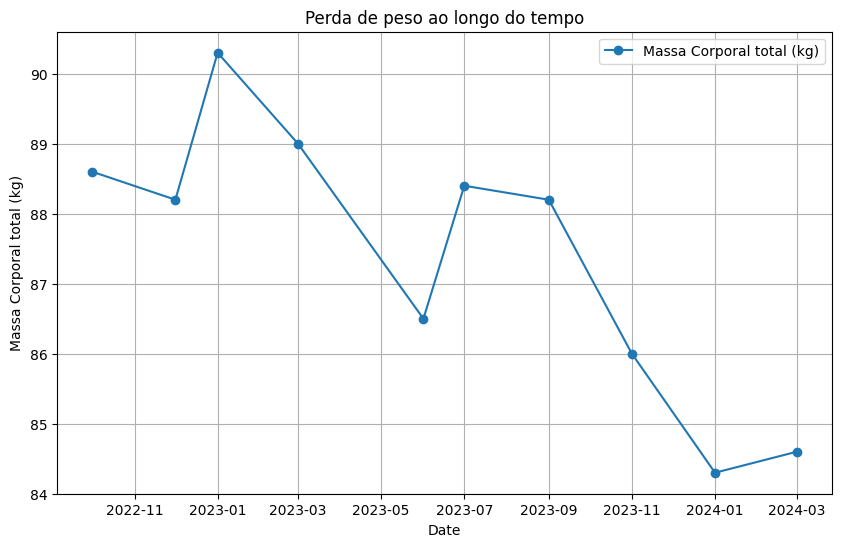

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df['data'], df['Massa Corporal total (kg)'], label='Massa Corporal total (kg)', marker='o')
plt.xlabel('Date')
plt.ylabel('Massa Corporal total (kg)')
plt.title('Perda de peso ao longo do tempo')
plt.legend()
plt.grid(True)
plt.show()

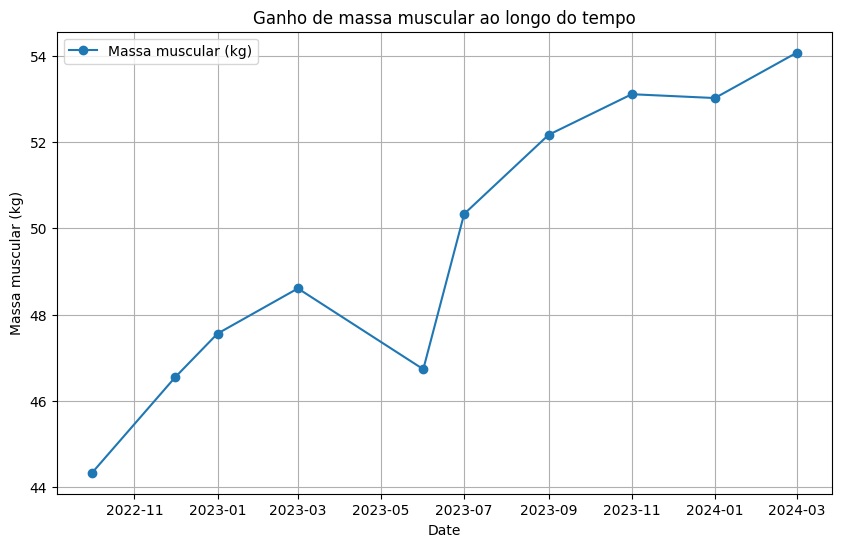

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df['data'], df['Massa muscular (kg)'], label='Massa muscular (kg)', marker='o')
plt.xlabel('Date')
plt.ylabel('Massa muscular (kg)')
plt.title('Ganho de massa muscular ao longo do tempo')
plt.legend()
plt.grid(True)
plt.show()

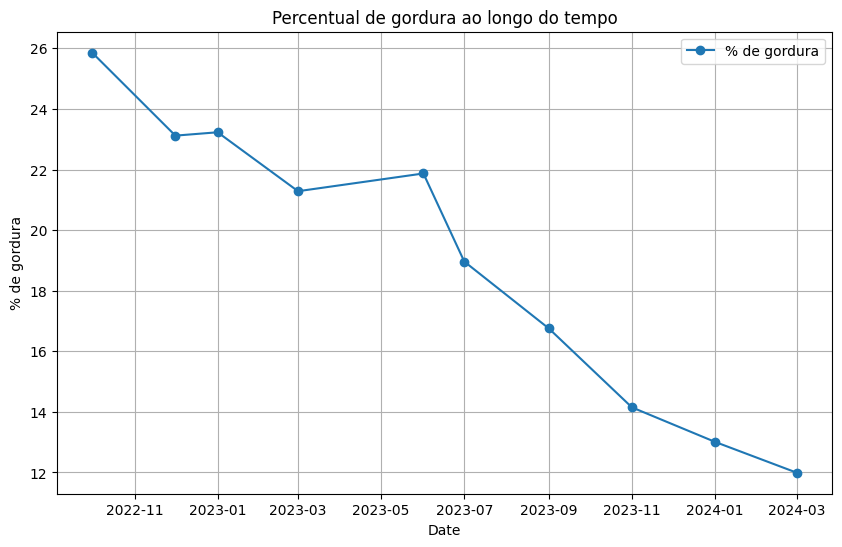

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(df['data'], df['% de gordura'], label='% de gordura', marker='o')
plt.xlabel('Date')
plt.ylabel('% de gordura')
plt.title('Percentual de gordura ao longo do tempo')
plt.legend()
plt.grid(True)
plt.show()

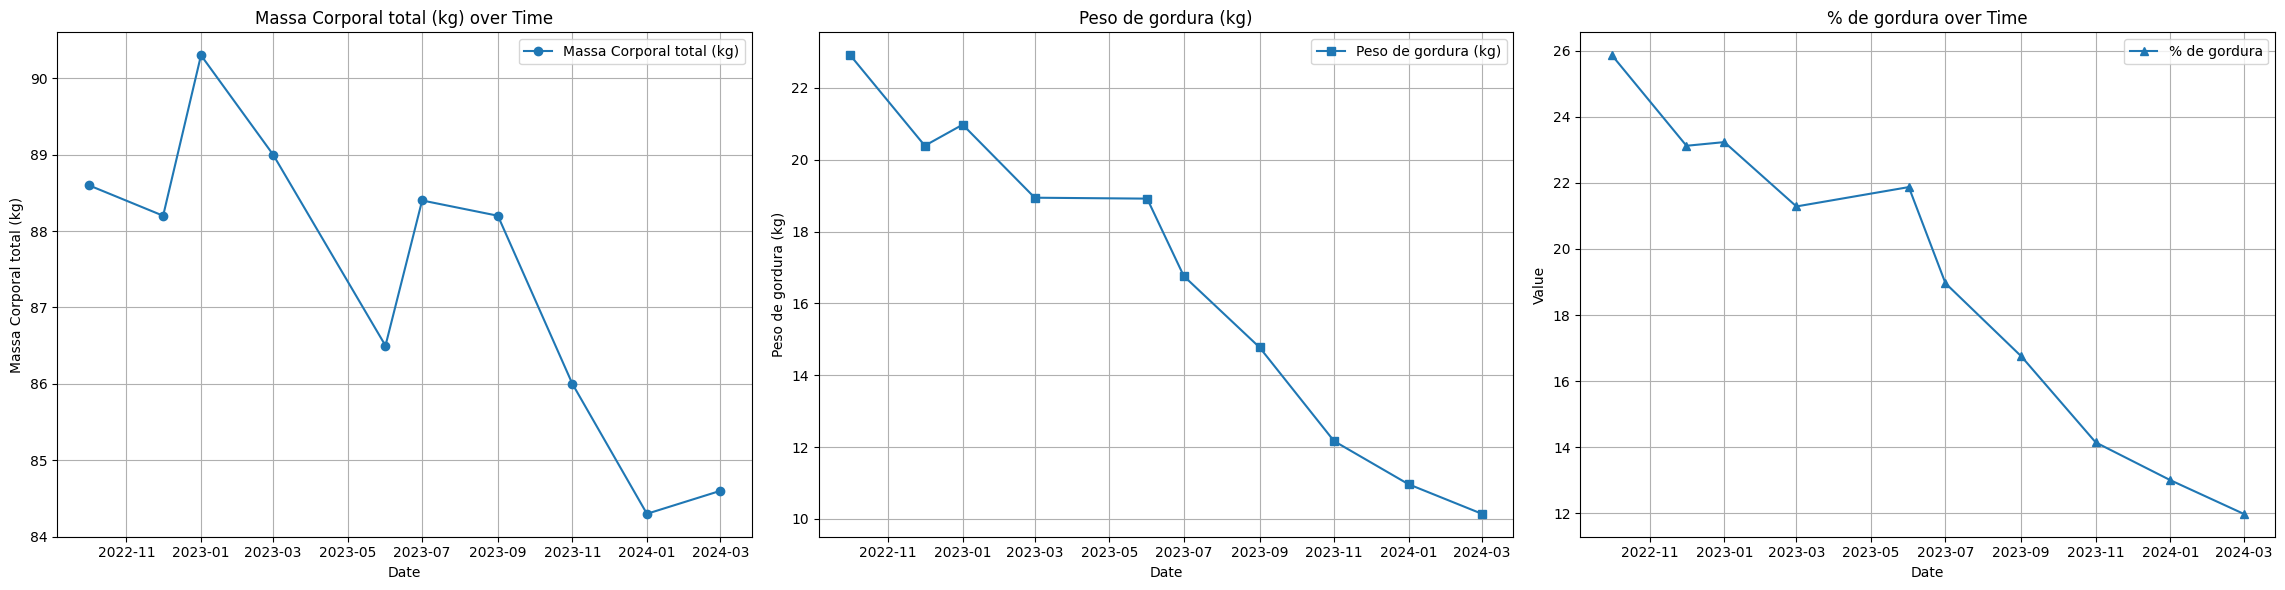

In [26]:
#Resumo
plt.figure(figsize=(23, 6))

# Primeiro gráfico
plt.subplot(1, 3, 1)
plt.plot(df['data'], df['Massa Corporal total (kg)'], label='Massa Corporal total (kg)', marker='o')
plt.xlabel('Date')
plt.ylabel('Massa Corporal total (kg)')
plt.title('Massa Corporal total (kg) over Time')
plt.legend()
plt.grid(True)

# Segundo gráfico
plt.subplot(1, 3, 2)
plt.plot(df['data'], df['Peso de gordura (kg)'], label='Peso de gordura (kg)', marker='s')
plt.xlabel('Date')
plt.ylabel('Peso de gordura (kg)')
plt.title('Peso de gordura (kg)')
plt.legend()
plt.grid(True)

# Terceiro gráfico
plt.subplot(1, 3, 3)
plt.plot(df['data'], df['% de gordura'], label='% de gordura', marker='^')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('% de gordura over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()